### __BUSA8001 Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 4 November 2022 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 4 November 2022 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of up to 3 students (minimum 2) and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models

- You will:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1](https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses 
- All team members should work on all the tasks listed below however   
    - **Choose a team member who will be responsible for one of each of the 3 tasks listed below**    

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 7 marks will be deducted from each Task for which there is no video presentation 

**Competition Marks:**  

- 2 marks: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit  (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 7 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_Team21`
- Team Leader and Team Member 1: `Michelle Melisa Flood 47106905 (Worked on all 3 tasks)`
- Team Member 2: `Smriti Pradhananga 46188290 (Worked on all 3 tasks)`
- Team Member 3: `Nishant Somani 46308326 (Worked on all 3 tasks)`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1](https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem
    - Evaluation Criteria
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Note: you should **not** discuss any specific predictive algorithms at this stage.
    
Total Marks: 12


### Problem Description
This analysis aims to examine the data of Melbourne Airbnb in regards to several characteristics of the already listed properties and determine prices for new properties. Such analysis can be useful for people who are not certain of the price to be listed or for people who want to review the existing price. Thus, the model should provide the right price for the listing in Melbourne Airbnb, based on the existing market attributes.

#### Forecasting Problem
We were provided with two datasets: training and test. For the prediction of price, the training dataset was to be used as a base to predict the new listing prices of properties. The main problem during the forecasting of price is that there are 61 variables in the dataset including the price. Thus, it is difficult to know which features are important, or if new features can be created. In addition, the dataset contained many text data which can be hard to interpret. Additionally, there are many null values in the dataset which makes the data preprocessing time longer, and they have to imputed only after extensively looking into the various features.

#### Evaluation Criteria
The prediction accuracy of the dataset is evaluated in terms of root-mean-square error (RMSE). RMSE is the residuals' standard deviation (prediction errors). Residuals are a measure of how far away data points are from the regression line. It is a measure of how spread out these residuals are. In other words, it indicates how concentrated the data is around the best fit line. 

#### Types of Variables/Features
By looking at the datsset we have found out that there are 4 main types of variables. which are shown in table below. 

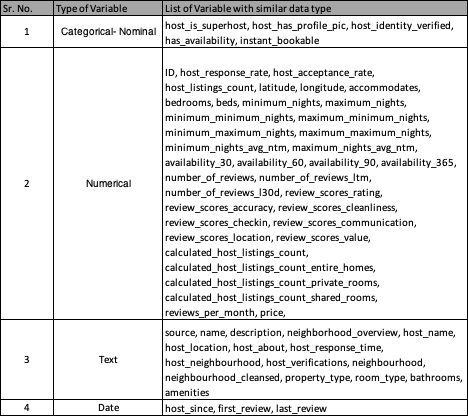

#### Data Summary and main data characteristics

The data provided is in two excel sheets- training & test data 61 & 60 columns respectively. The entries for each dataset were 7000 & 3000 respectively. Many of the features are possibly highly related to each other such as availabilities_30, availabilities_60, availabilities_90, availabilities_365. 

Most of the data is in text & numeric for, but few categorical features column can be found such as host_is_superhost, host_has_profile_pic, host_identity_verified, has_availability, instant_bookable.

There are many columns that realte with host rather than the property such as Host_name, host_about, host_location, etc. which are irrelevant and shall be eliminated.

#### Missing Values
In training dataset, 23 out of 61 columns contain missing values, column with highest null being ‘host_neighbourhood’. As for testing dataset, 28 out of 60 columns have missing values, column with highest null is also ‘host_neighbourhood’. Missing values of categorical feature will be interpolated with mode while missing values of numerical feature will be interpolated with median.

---

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the files
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.shape

(7000, 61)

In [4]:
df_test.shape

(3000, 60)

In [5]:
# checking missing values from the datasets
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_train, percent_train, total_test, percent_test ], axis=1, keys=['Total_train', 'Percent_train','Total_test','Percent_test'])
missing_data.head(10)

,Total_train,Percent_train,Total_test,Percent_test
host_neighbourhood,3341,0.477286,2213.0,0.737667
host_about,2280,0.325714,1451.0,0.483667
neighborhood_overview,1791,0.255857,1470.0,0.490000
neighbourhood,1791,0.255857,1470.0,0.490000
host_location,1356,0.193714,720.0,0.240000
bedrooms,358,0.051143,82.0,0.027333
room_type,134,0.019143,41.0,0.013667
neighbourhood_cleansed,108,0.015429,42.0,0.014000
beds,85,0.012143,12.0,0.004000
property_type,84,0.012000,39.0,0.013000


In [6]:
#dropping columns that have high missing data
cols_to_drop = ['host_neighbourhood', 'host_about', 'neighborhood_overview', 'neighbourhood', 'host_location']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without exaplaining what they do and why you used them 

Total Marks: 12

**Minimum and Maximum nights**

In [7]:
#looking into minimum and maximum nights
df_train[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm']].corr(method = 'pearson')

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm
minimum_nights,1.000000,0.006795,0.888391,0.988808,0.988371
maximum_nights,0.006795,1.000000,0.006888,0.005681,0.006277
minimum_minimum_nights,0.888391,0.006888,1.000000,0.880834,0.937815
maximum_minimum_nights,0.988808,0.005681,0.880834,1.000000,0.985033
minimum_nights_avg_ntm,0.988371,0.006277,0.937815,0.985033,1.000000


Various columns for minimum and maximum night stays are included in the dataset. Out of which, two main night stays will be used, due to minor differences amongst each other. For instance, minimum_nights and minimum_minimum_nights, here, the latter supposedly refers to the fact that minimum and maximum night stays can differ throughout the year. Therefore, only the default (i.e. most frequently used) min/max night stay values will be used.

In [8]:
#dropping highly correlated maximum and minimum nights
cols_to_drop = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

**Availability**

In [9]:
#availablity columns
df_train[['availability_30', 'availability_60', 'availability_90', 'availability_365']].corr()

,availability_30,availability_60,availability_90,availability_365
availability_30,1.000000,0.917517,0.844934,0.451333
availability_60,0.917517,1.000000,0.961328,0.507560
availability_90,0.844934,0.961328,1.000000,0.545400
availability_365,0.451333,0.507560,0.545400,1.000000


Likewise, there are numerous measures of availability that highly correlates with each other. Thus, one will be kept, and it will be available for 90 days (availability 90). This is due to regulations such as 90-day rents per year.

In [10]:
#dropping highly correlated availability
cols_to_drop = ['availability_30', 'availability_60', 'availability_365']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

**Reviews**

In [11]:
#review columns
df_train[['number_of_reviews_ltm', 'reviews_per_month', 'number_of_reviews','number_of_reviews_l30d']].corr()

,number_of_reviews_ltm,reviews_per_month,number_of_reviews,number_of_reviews_l30d
number_of_reviews_ltm,1.000000,0.894179,0.622978,0.789573
reviews_per_month,0.894179,1.000000,0.684857,0.731521
number_of_reviews,0.622978,0.684857,1.000000,0.498111
number_of_reviews_l30d,0.789573,0.731521,0.498111,1.000000


number_of_reviews_ltm and reviews_per_month will be highly correlated with number_of_reviews and thus will be dropped.

In [12]:
#dropping highly correlated review columns
cols_to_drop = ['number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

---

#### Dropping irrelevant columns
There are many variables that relates to host and not the property, so we will be dropping them. Likewise, there are irrelevant information on source, description etc. which would not predict the price accurately.

In [13]:
#dropping irrelevant columns 
cols_to_drop1 = ['source', 'name', 'description', 'host_name', 'host_since','host_has_profile_pic',  
                 'latitude','longitude', 'has_availability','first_review', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications']

df_train = df_train.drop(cols_to_drop1, axis = 1)
df_test = df_test.drop(cols_to_drop1, axis = 1)

#replacing columns with f as 0 and t as 1
df_train.replace({'f': 0, 't': 1}, inplace = True)
df_test.replace({'f': 0, 't': 1}, inplace = True)

---

**Task 2, Question 1**: 

Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature. (2 marks)

**Price**

In [14]:
#replacing string characters from the price column
df_train['price'] = df_train['price'].str.replace('$','')
df_train['price'] = df_train['price'].str.replace(',','')

#converting the price column into numeric
df_train["price"] = pd.to_numeric(df_train["price"])

**Host Response Rate and Host Acceptance Rate**

In [15]:
#replacing string characters from columns
df_train['host_response_rate'] = df_train['host_response_rate'].str.replace('%','')
df_test['host_response_rate'] = df_test['host_response_rate'].str.replace('%','')
df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].str.replace('%','')
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].str.replace('%','')

#converting columns into numeric
df_train["host_response_rate"] = pd.to_numeric(df_train["host_response_rate"])
df_test["host_response_rate"] = pd.to_numeric(df_test["host_response_rate"])
df_train["host_acceptance_rate"] = pd.to_numeric(df_train["host_acceptance_rate"])
df_test["host_acceptance_rate"] = pd.to_numeric(df_test["host_acceptance_rate"])

In [16]:
#converting rates into scores out of 5 as reviews are also rated out of 5, maintaining uniformity
df_train["host_response_rate"] = ((df_train["host_response_rate"])/100)*5
df_test["host_response_rate"] = ((df_test["host_response_rate"])/100)*5
df_train["host_acceptance_rate"] = ((df_train["host_acceptance_rate"])/100)*5
df_test["host_acceptance_rate"] = ((df_test["host_acceptance_rate"])/100)*5

**Task 2, Question 2** 
Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  (2 marks)

**Bathroom**

In [17]:
#split bathrooms into 2 new columns called num_bathrooms and private_bathroom
df_train[['num_bathrooms','private_bathroom','column3']] = df_train.bathrooms.str.split(" ", expand = True)
df_test[['num_bathrooms','private_bathroom','column3']] = df_test.bathrooms.str.split(" ", expand = True)

#drop excess column
del df_train['column3']
del df_test['column3']

#encode values so shared bathroom shows 0 and private bathroom shows 1 in the private_bathroom column (not mentioned also indicates 1)
df_train['private_bathroom'] = df_train['private_bathroom'].replace(['shared', 'bath', 'baths', 'private', None], [0, 1, 1, 1, 1])
df_train['private_bathroom'][df_train.num_bathrooms == 'Private'] = 1
df_train['private_bathroom'][df_train.num_bathrooms == 'Shared'] = 0

#change the num_bathrooms of rows that its bathrooms variable does not start with a number
df_train['num_bathrooms'] = df_train['num_bathrooms'].replace(['Half-bath', 'Private', 'Shared'], 0.5)

#do the same for the testing dataset
df_test['private_bathroom'] = df_test['private_bathroom'].replace(['shared', 'bath', 'baths', 'private', None], [0, 1, 1, 1, 1])
df_test['private_bathroom'][df_test.num_bathrooms == 'Private'] = 1
df_test['private_bathroom'][df_test.num_bathrooms == 'Shared'] = 0
df_test['num_bathrooms'] = df_test['num_bathrooms'].replace(['Half-bath', 'Private', 'Shared'], 0.5)

#convert to a suitable data type
df_train['num_bathrooms'] = pd.to_numeric(df_train['num_bathrooms'])
df_train['private_bathroom'] = df_train['private_bathroom'].astype(int)
df_test['num_bathrooms'] = pd.to_numeric(df_test['num_bathrooms'])
df_test['private_bathroom'] = df_test['private_bathroom'].astype(int)

**Review columns**

In [18]:
#adding the review colums and getting their average
sum_review_train = df_train['review_scores_rating'] + df_train['review_scores_accuracy'] + df_train['review_scores_cleanliness'] + df_train['review_scores_checkin'] + df_train['review_scores_communication'] + df_train['review_scores_location'] + df_train['review_scores_value']
average_review_train = sum_review_train/7
average_review_train = average_review_train.to_frame(name = 'average_review')
df_train = df_train.join(average_review_train)

#do the same for testing dataset
sum_review_test = df_test['review_scores_rating'] + df_test['review_scores_accuracy'] + df_test['review_scores_cleanliness'] + df_test['review_scores_checkin'] + df_test['review_scores_communication'] + df_test['review_scores_location'] + df_test['review_scores_value']
average_review_test = sum_review_test/7
average_review_test = average_review_test.to_frame(name = 'average_review')
df_test = df_test.join(average_review_test)

**Amenities**

In [19]:
#create new amenities columns
df_train.loc[df_train['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df_train.loc[df_train['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df_train.loc[df_train['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df_train.loc[df_train['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df_train.loc[df_train['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df_train.loc[df_train['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'appliance'] = 1
df_train.loc[df_train['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df_train.loc[df_train['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df_train.loc[df_train['amenities'].str.contains('parking'), 'parking'] = 1
df_train.loc[df_train['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace|Balcony|Patio'), 'outdoor_space'] = 1
df_train.loc[df_train['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1

#replacing nulls with zeros for new amenities columns and changing the data type to int
cols_to_replace_nulls = df_train.iloc[:,32:].columns
df_train[cols_to_replace_nulls] = df_train[cols_to_replace_nulls].fillna(0)
df_train[cols_to_replace_nulls] = df_train[cols_to_replace_nulls].astype(int)

#do the same for the testing dataset
df_test.loc[df_test['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df_test.loc[df_test['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df_test.loc[df_test['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df_test.loc[df_test['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df_test.loc[df_test['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df_test.loc[df_test['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'appliance'] = 1
df_test.loc[df_test['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df_test.loc[df_test['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df_test.loc[df_test['amenities'].str.contains('parking'), 'parking'] = 1
df_test.loc[df_test['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace|Balcony|Patio'), 'outdoor_space'] = 1
df_test.loc[df_test['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1

cols_to_replace_nulls = df_test.iloc[:,31:].columns
df_test[cols_to_replace_nulls] = df_test[cols_to_replace_nulls].fillna(0)
df_test[cols_to_replace_nulls] = df_test[cols_to_replace_nulls].astype(int)

In [20]:
#sum the total number of main amenities
df_train['sum_amenities'] = df_train['air_conditioning'] + df_train['bbq'] + df_train['nature_and_views'] + df_train['breakfast'] + df_train['cooking_basics'] + df_train['appliance'] + df_train['gym'] + df_train['child_friendly'] + df_train['parking'] + df_train['outdoor_space'] + df_train['hot_tub_sauna_or_pool']
df_test['sum_amenities'] = df_test['air_conditioning'] + df_test['bbq'] + df_test['nature_and_views'] + df_test['breakfast'] + df_test['cooking_basics'] + df_test['appliance'] + df_test['gym'] + df_test['child_friendly'] + df_test['parking'] + df_test['outdoor_space'] + df_test['hot_tub_sauna_or_pool']

#drop columns after encoding
cols_to_drop2 = ['air_conditioning', 'bbq', 'nature_and_views', 'breakfast', 'cooking_basics', 'appliance', 'gym',
                 'child_friendly', 'parking', 'outdoor_space', 'hot_tub_sauna_or_pool', 'bathrooms']

df_train = df_train.drop(cols_to_drop2, axis=1)
df_test = df_test.drop(cols_to_drop2, axis=1)

In [21]:
#counting the number of amenities and adding it to the n_amenities column
df_train['n_amenities'] = df_train['amenities'].apply(lambda x: len(x.replace('{', '').replace('{', '').\
                                                                    replace('"', '').split(',')))

df_test['n_amenities'] = df_test['amenities'].apply(lambda x: len(x.replace('{', '').replace('{', '').\
                                                                    replace('"', '').split(',')))

#drop columns after encoding
cols_to_drop3 = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'amenities']

df_train = df_train.drop(cols_to_drop3, axis=1)
df_test = df_test.drop(cols_to_drop3, axis=1)

**Review Dates**

In [22]:
#convert last_review to datetime
df_train.last_review = pd.to_datetime(df_train.last_review)

#calculate the number of days since last_review from 1st Nov 2022
df_train['since_last_review'] = (pd.datetime(2022, 11, 1) - df_train.last_review).astype('timedelta64[D]')

#do the same for the testing dataset
df_test.last_review = pd.to_datetime(df_test.last_review)
df_test['since_last_review'] = (pd.datetime(2022, 11, 1) - df_test.last_review).astype('timedelta64[D]')

#drop columns after encoding
df_train = df_train.drop(['last_review'], axis=1)
df_test = df_test.drop(['last_review'], axis=1)

**Task 2, Question 3**: 
Impute missing values for all features in both training and test datasets. (3 marks)

**Filling missing values from the dataset**

In [23]:
#interpulate missing values with a median for numerical variables
for col in ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds', 'num_bathrooms', 'since_last_review','availability_90', 'average_review']:
            df_train[col].fillna(df_train[col].median(), inplace = True)

for col in ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds','num_bathrooms', 'since_last_review','availability_90', 'average_review']:
            df_test[col].fillna(df_test[col].median(), inplace = True)

#interpulate missing values with mode for categorical variables
cols_mode = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type']
df_train[cols_mode] = df_train[cols_mode].fillna(df_train.mode().iloc[0])
df_test[cols_mode] = df_test[cols_mode].fillna(df_test.mode().iloc[0])

#for this column, NA means 0
df_train['sum_amenities'] = df_train['sum_amenities'].fillna(0)
df_test['sum_amenities'] = df_test['sum_amenities'].fillna(0)

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode. (2 marks)

**Neighbourhood Cleansed**

In [24]:
#replace other than the top 5 neighbourhood_cleansed with 'OtherNeighbourhood'
df_train.loc[~df_train.neighbourhood_cleansed.isin(['Melbourne',
                                                    'Port Phillip',
                                                    'Yarra Ranges',
                                                    'Yarra',
                                                    'Stonnington']), 'neighbourhood_cleansed'] = 'OtherNeighbourhood'
df_test.loc[~df_test.neighbourhood_cleansed.isin(['Melbourne',
                                                  'Port Phillip',
                                                  'Yarra Ranges',
                                                  'Yarra',
                                                  'Stonnington']), 'neighbourhood_cleansed'] = 'OtherNeighbourhood'

In [25]:
#one_hot encoding the neighbourhood_cleansed column
one_hot3 = pd.get_dummies(df_train[['neighbourhood_cleansed']])
one_hot3.rename(columns = {'neighbourhood_cleansed_Melbourne':'Melbourne',
                           'neighbourhood_cleansed_Port Phillip':'Port Phillip',
                           'neighbourhood_cleansed_Yarra Ranges':'Yarra Ranges',
                           'neighbourhood_cleansed_Yarra':'Yarra',
                           'neighbourhood_cleansed_Stonnington':'Stonnington',
                           'neighbourhood_cleansed_OtherNeighbourhood':'OtherNeighbourhood'}, inplace = True)
df_train = pd.concat([df_train, one_hot3], axis=1)

#do the same for testing dataset
one_hot4 = pd.get_dummies(df_test[['neighbourhood_cleansed']])
one_hot4.rename(columns = {'neighbourhood_cleansed_Melbourne':'Melbourne',
                           'neighbourhood_cleansed_Port Phillip':'Port Phillip',
                           'neighbourhood_cleansed_Yarra Ranges':'Yarra Ranges',
                           'neighbourhood_cleansed_Yarra':'Yarra',
                           'neighbourhood_cleansed_Stonnington':'Stonnington',
                           'neighbourhood_cleansed_OtherNeighbourhood':'OtherNeighbourhood'}, inplace = True)
df_test = pd.concat([df_test, one_hot4], axis=1)

#drop columns after encoding
df_train = df_train.drop(['neighbourhood_cleansed'], axis=1)
df_test = df_test.drop(['neighbourhood_cleansed'], axis=1)

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done. (1 marks)

**Host Response Time**

In [26]:
#mapping integer to host_response_time
host_response_time_mapping = {'within an hour':4, 'within a few hours':3, 'within a day':2, 'a few days or more':1}
df_train['host_response_time'] = df_train['host_response_time'].map(host_response_time_mapping)
df_test['host_response_time'] = df_test['host_response_time'].map(host_response_time_mapping)

**Room type**

In [27]:
#mapping integer to room_type
room_type_mapping = {'Entire home/apt':4, 'Hotel room':3, 'Private room':2, 'Shared room':1}
df_train['room_type'] = df_train['room_type'].map(room_type_mapping)
df_test['room_type'] = df_test['room_type'].map(room_type_mapping)

**Property type**

In [28]:
#replace other than the top 4 property_type with 'OtherPropertyType'
df_train.loc[~df_train.property_type.isin(['Entire rental unit',
                                           'Entire home',
                                           'Private room in home',
                                           'Private room in rental unit']), 'property_type'] = 'OtherPropertyType'
df_test.loc[~df_test.property_type.isin(['Entire rental unit',
                                         'Entire home',
                                         'Private room in home',
                                         'Private room in rental unit']), 'property_type'] = 'OtherPropertyType'

In [29]:
#mapping integer to property type
property_type_mapping = {'Entire home':4, 'Entire rental unit':4, 'Private room in home':3, 'Private room in rental unit':2, 'OtherPropertyType':1}
df_train['property_type'] = df_train['property_type'].map(property_type_mapping)
df_test['property_type'] = df_test['property_type'].map(property_type_mapping)

#drop columns after encoding
df_train = df_train.drop(['property_type'], axis=1)
df_test = df_test.drop(['property_type'], axis=1)

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

**Distribution of price**

With price being our target variable, we shall see the distribution of price in the dataset.

Text(0, 0.5, 'Percentage(%)')

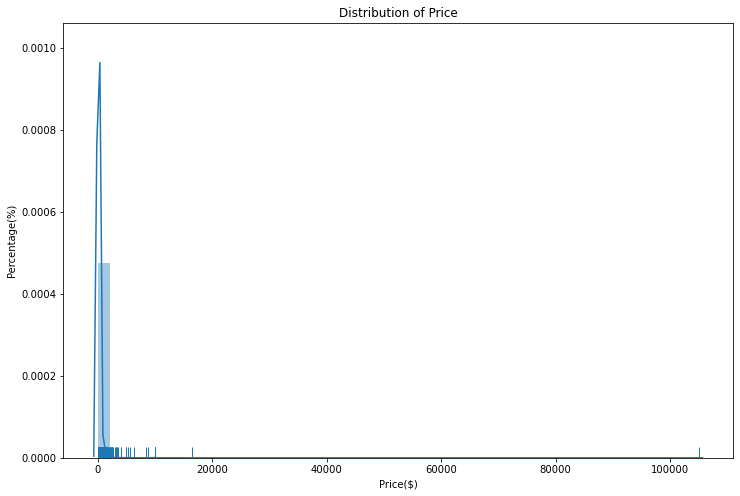

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(df_train['price'],rug=True)
plt.title('Distribution of Price')
plt.xlabel('Price($)')
plt.ylabel('Percentage(%)')

Here, the lines represents the price in those coordinates. We observe that there are few outliers in the dataset and thus we shall drop these rows containing the outliers.

In [31]:
#drop price outliers
df_train.drop(df_train[df_train.price > 10000].index, inplace=True)

Text(0, 0.5, 'Percentage(%)')

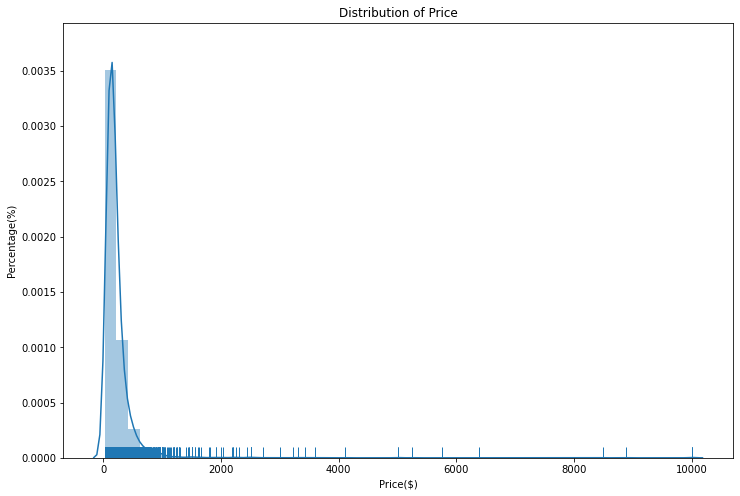

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(df_train['price'],rug=True)
plt.title('Distribution of Price')
plt.xlabel('Price($)')
plt.ylabel('Percentage(%)')

Now, we can observe the distribution of price much better. We still see the varying of price range but we shall not consider them as outliers as the property type contained in the dataset are worth the prices.

**Correlation Matrix**

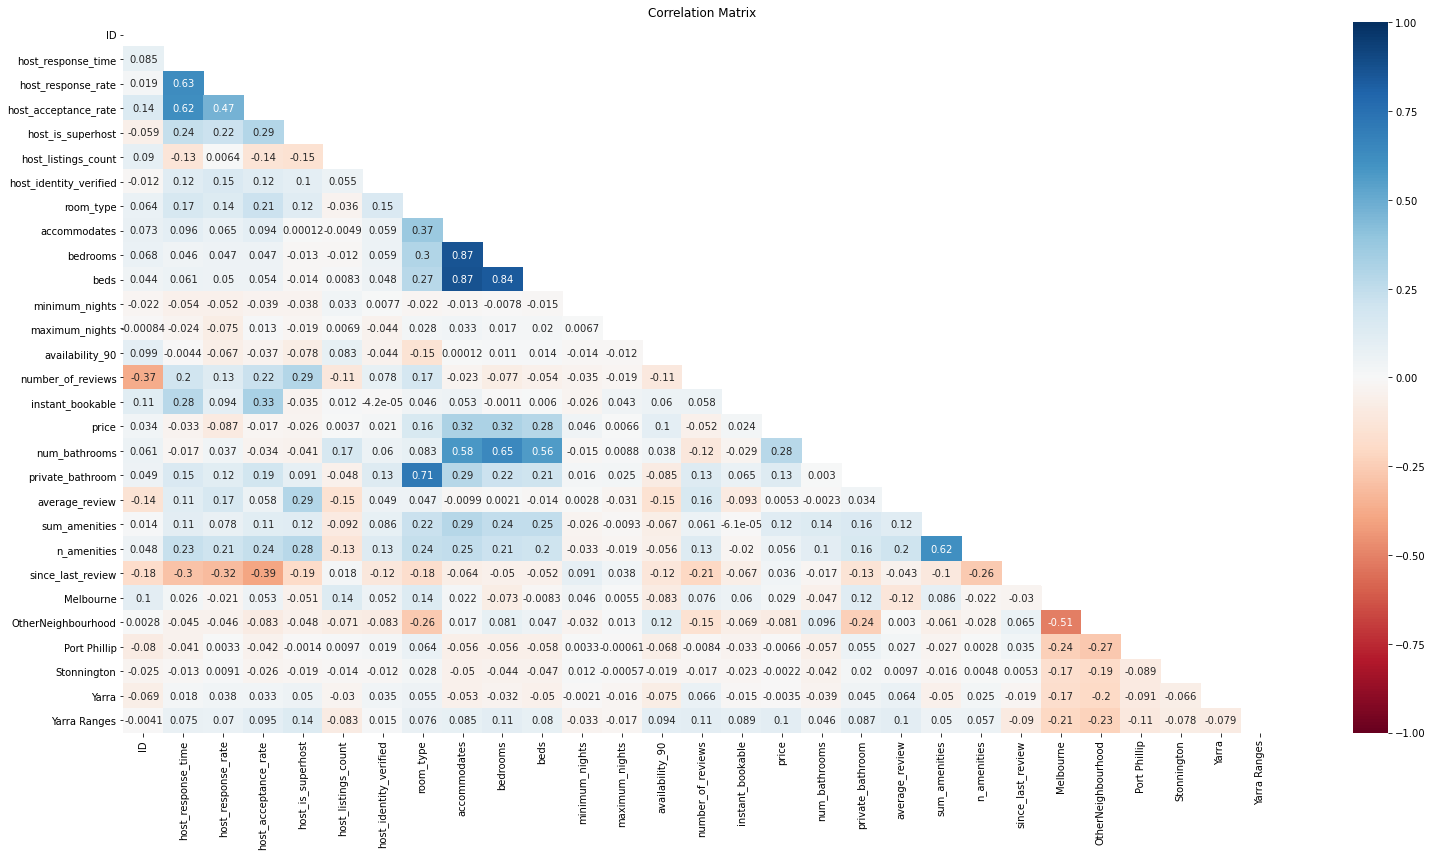

In [33]:
plt.figure(figsize=(22, 12))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
s = sns.heatmap(df_train.corr(),
                annot=True,
                mask=mask,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The figure above shows us the correlation matrix among the variables in the dataset. Here we can observe that Sum_property_type and OtherPropertyType has the lowest (-0.94) correlation. Whereas, accommodates and beds have the highest correlation of 0.87, which makes sense as we need more beds if more people would like to stay at the property. We know that correlation matrix does not define non-linear relationships well, so we shall plot the variables to have a further clarification on the variables.

**Pair plots**

<Figure size 432x288 with 0 Axes>

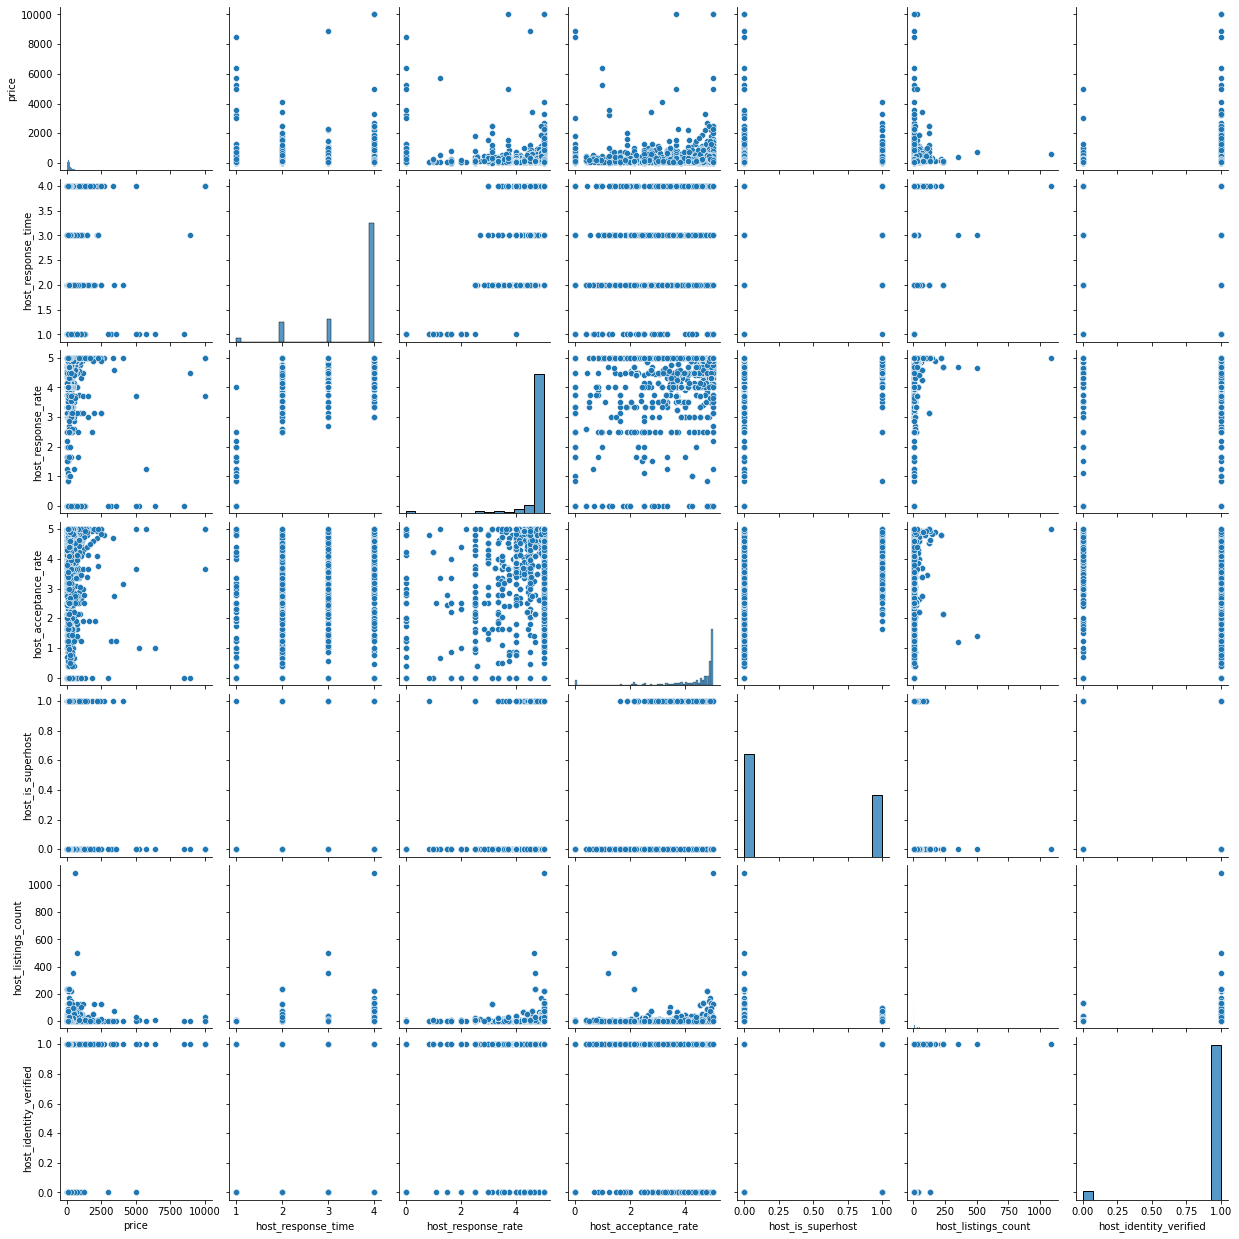

In [34]:
cols = ['price','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count',
       'host_identity_verified']
plt.figure()
sns.pairplot(df_train[cols])
plt.show()

<Figure size 432x288 with 0 Axes>

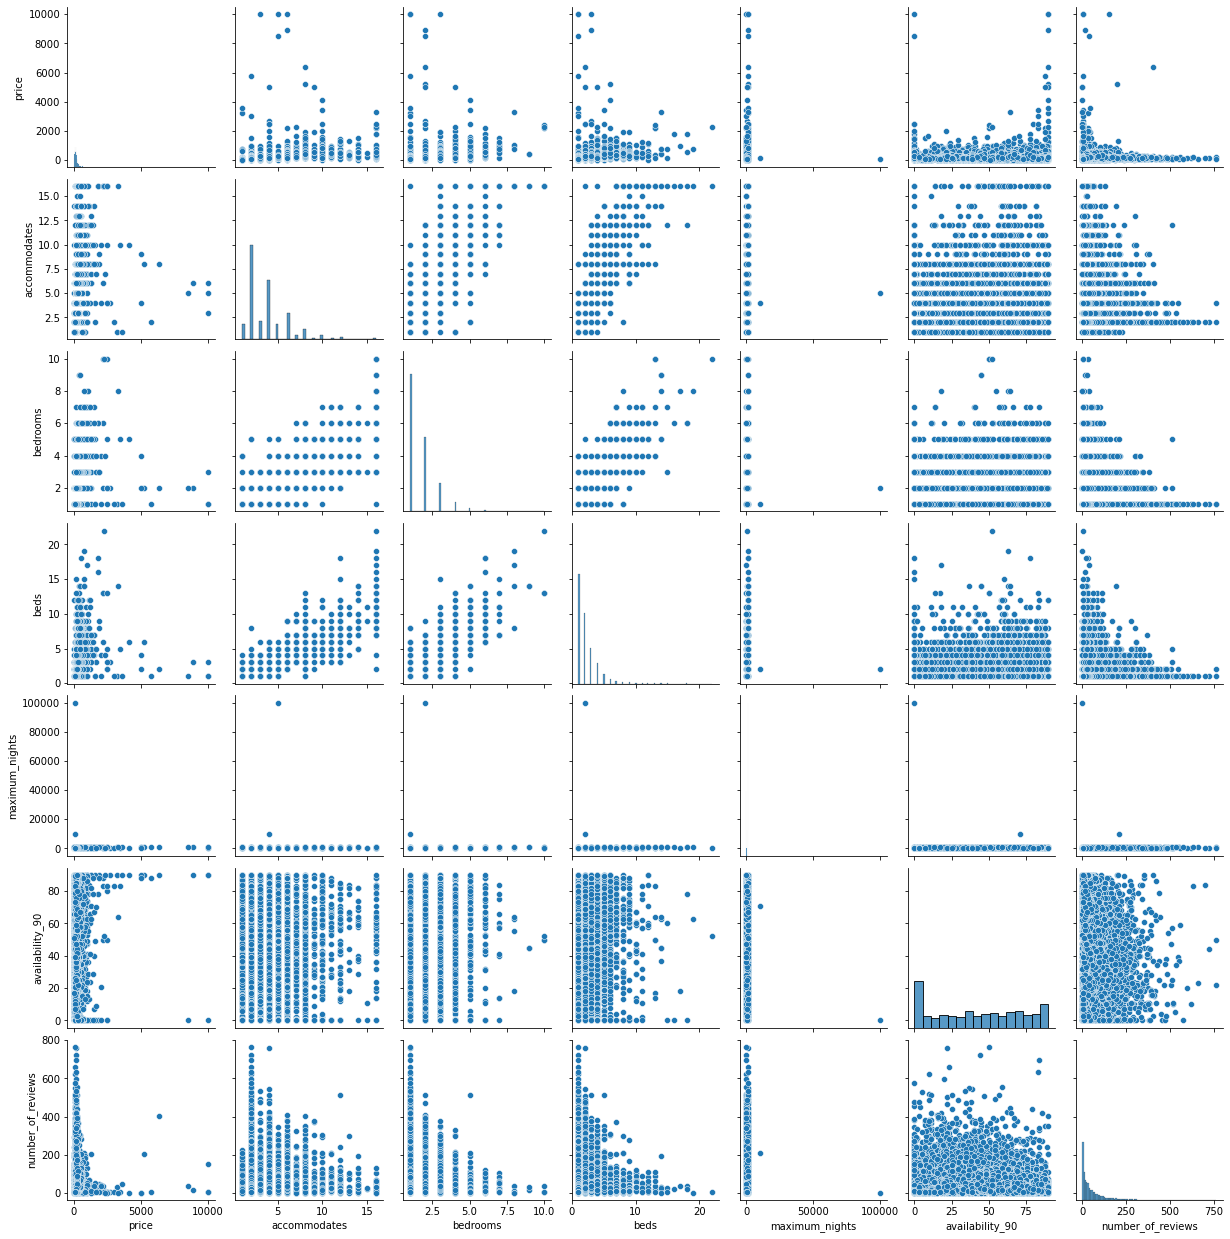

In [35]:
cols = ['price','accommodates','bedrooms','beds','maximum_nights','availability_90','number_of_reviews']
plt.figure()
sns.pairplot(df_train[cols])
plt.show()

<Figure size 432x288 with 0 Axes>

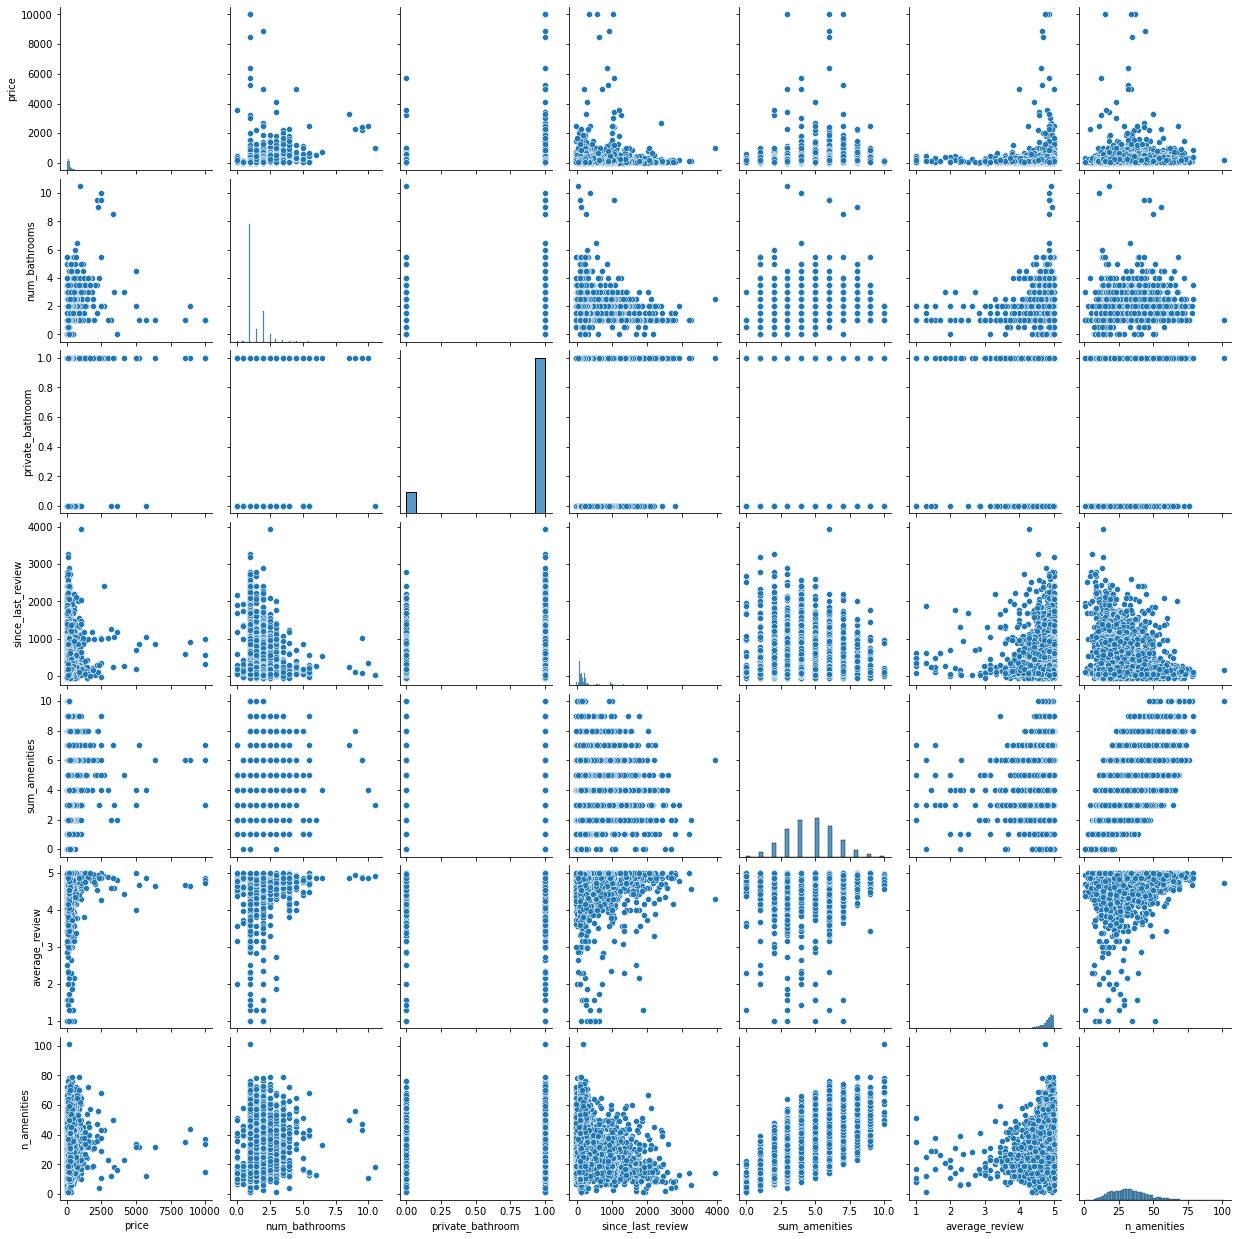

In [36]:
cols = ['price','num_bathrooms','private_bathroom','since_last_review','sum_amenities','average_review','n_amenities']
plt.figure()
cols_to_plot = df_train.columns[1:3].tolist() + ['price'] #explicitly add price column
sns.pairplot(df_train[cols])
plt.show()

From the three plots above, we see that there is not a significant linear relationship among price and the variables, but has mostly spread throughout. With this in mind, during the modelling we shall use non-linear models to impute the value of price.

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well you will need to iterate Task 3, building and tuning various models in order to find the best one.

Total Marks: 12

In [37]:
df_train.info()
# df_train.to_excel('data_clean_train.xlsx', header=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6998 entries, 0 to 6999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      6998 non-null   int64  
 1   host_response_time      6998 non-null   int64  
 2   host_response_rate      6998 non-null   float64
 3   host_acceptance_rate    6998 non-null   float64
 4   host_is_superhost       6998 non-null   int64  
 5   host_listings_count     6998 non-null   int64  
 6   host_identity_verified  6998 non-null   int64  
 7   room_type               6998 non-null   int64  
 8   accommodates            6998 non-null   int64  
 9   bedrooms                6998 non-null   float64
 10  beds                    6998 non-null   float64
 11  minimum_nights          6998 non-null   int64  
 12  maximum_nights          6998 non-null   int64  
 13  availability_90         6998 non-null   int64  
 14  number_of_reviews       6998 non-null   

In [38]:
df_test.info()
# df_test.to_excel('data_clean_test.xlsx', header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   host_response_time      3000 non-null   int64  
 2   host_response_rate      3000 non-null   float64
 3   host_acceptance_rate    3000 non-null   float64
 4   host_is_superhost       3000 non-null   int64  
 5   host_listings_count     3000 non-null   float64
 6   host_identity_verified  3000 non-null   int64  
 7   room_type               3000 non-null   int64  
 8   accommodates            3000 non-null   int64  
 9   bedrooms                3000 non-null   float64
 10  beds                    3000 non-null   float64
 11  minimum_nights          3000 non-null   int64  
 12  maximum_nights          3000 non-null   int64  
 13  availability_90         3000 non-null   int64  
 14  number_of_reviews       3000 non-null   

In [39]:
#from above, we can still see irrelevant columns so dropping them
cols_to_drop1 = ['Stonnington', 'Port Phillip', 'OtherNeighbourhood', 'instant_bookable','minimum_nights']

df_train = df_train.drop(cols_to_drop1, axis = 1)
df_test = df_test.drop(cols_to_drop1, axis = 1)

In [40]:
#preparing training and testing datasets
X_train = df_train.drop(['price','ID', 'average_review', 'maximum_nights'], axis=1).values
y_train = df_train.price.values
X_test = df_test.drop(['ID', 'average_review','maximum_nights'], axis=1).values

**Importing libraries for prediction models**

In [41]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#scaling data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

After several runs of the algorithms, we found that scaling the data did not increase the accuracy so we shall not be using the scaled data.

**Simple Linear Regression**

In [42]:
slr = LinearRegression().fit(X_train, y_train)

#Create grid for Linear Regression
slr_param_grid = {'fit_intercept': [False, True],
                 'normalize': [False, True]}    

# K-fold on training
slr_grid_search = GridSearchCV(slr, slr_param_grid, cv=KFold(n_splits=10, random_state=8,shuffle=True), return_train_score=True)
slr_grid_search.fit(X_train, y_train)
slr_predicted = slr_grid_search.predict(X_test)

# Evaluation
print('Best fit_intercept: ' , slr_grid_search.best_params_['fit_intercept'])
print('Best normalize: ' , slr_grid_search.best_params_['normalize'])

Best fit_intercept:  False
Best normalize:  False


In [43]:
#use Linear Regression
slr = LinearRegression(fit_intercept=False, normalize=False)
slr.fit(X_train, y_train)
y_train_pred_slr = slr.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_slr)):.3f}')

# y_test_pred_slr = slr.predict(X_test)

RMSE train: 328.716


**RANSAC Regression**

In [44]:
#use RANSAC Regressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=200,
                         min_samples=90,
                         residual_threshold=5.0,
                         random_state=5)
ransac.fit(X_train, y_train)
y_train_pred_ransac = ransac.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_ransac)):.3f}')

RMSE train: 343.172


**Ridge Regression**

In [45]:
ridge = Ridge()

#Create grid for Ridge
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}    

# K-fold on training
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=KFold(n_splits=10, random_state=8,shuffle=True), return_train_score=True)
ridge_grid_search.fit(X_train, y_train)
ridge_predicted = ridge_grid_search.predict(X_test)

# Evaluation
print('Best alpha: ' + str(ridge_grid_search.best_params_['alpha']))

Best alpha: 100


In [46]:
#use Ridge Regressor
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_ridge)):.3f}')

# y_test_pred_ridge = ridge.predict(X_test)

RMSE train: 328.707


**Lasso Regression**

In [47]:
lasso = Lasso()

#Create grid for lasso
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}    

# K-fold on training
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=KFold(n_splits=10, random_state=8,shuffle=True), return_train_score=True)
lasso_grid_search.fit(X_train, y_train)
lasso_predicted = lasso_grid_search.predict(X_test)

# Evaluation
print('Best alpha: ' + str(lasso_grid_search.best_params_['alpha']))

Best alpha: 1


In [48]:
#use Lasso Regressor
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_lasso)):.3f}')

# y_test_pred_lasso = lasso.predict(X_test)

RMSE train: 328.757


**Elastic Net**

In [49]:
elasticnet = ElasticNet()

#Create grid for ElasticNet
elasticnet_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                        'l1_ratio': [0.001, 0.01, 0.1, 1, 10, 100]}    

# K-fold on training
elasticnet_grid_search = GridSearchCV(elasticnet, elasticnet_param_grid, cv=KFold(n_splits=10, random_state=8,shuffle=True), return_train_score=True)
elasticnet_grid_search.fit(X_train, y_train)
elasticnet_predicted = elasticnet_grid_search.predict(X_test)

# Evaluation
print('Best alpha: ' + str(elasticnet_grid_search.best_params_['alpha']))
print('Best l1_ratio: ' + str(elasticnet_grid_search.best_params_['l1_ratio']))

Best alpha: 1
Best l1_ratio: 1


In [50]:
#use ElasticNet Regressor
elasticnet = ElasticNet(alpha=1, l1_ratio=1)
elasticnet.fit(X_train, y_train)
y_train_pred_elasticnet = elasticnet.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_elasticnet)):.3f}')

# y_test_pred_elasticnet = elasticnet.predict(X_test)

RMSE train: 328.757


**Support Vector Machines (SVMs)**

In [51]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, Y_pred)):.3f}')
Y_pred = model_SVR.predict(X_test)

RMSE train: 363.557


**Stacking Regressor**

In [52]:
#!pip install mlxtend

forest = RandomForestRegressor()

from mlxtend.regressor import StackingCVRegressor

models = [elasticnet, ridge, forest]

stack = StackingCVRegressor(models, meta_regressor = Ridge(), cv=10)
stack.fit(X_train, y_train)

StackingCVRegressor(cv=10, meta_regressor=Ridge(),
                    regressors=[ElasticNet(alpha=1, l1_ratio=1),
                                Ridge(alpha=100), RandomForestRegressor()])

In [53]:
stack.fit(X_train, y_train)
stack_predicted = stack.predict(X_test)
y_train_pred_stack = stack.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_stack)):.3f}')

RMSE train: 198.063


**Random Forest Regressor**

In [54]:
# forest = RandomForestRegressor()

# # Create the parameter grid based on the results of random search 
# forest_param_grid  = {'criterion': ['mse', 'mae'],
#              'min_samples_split': [2, 5, 10],
#              'max_depth': ['None', 2, 6, 8],
#              'min_samples_leaf': [1, 5, 10],
#              'max_leaf_nodes': ['None', 5, 20]} 

# # Instantiate the grid search model
# forest_grid_search = GridSearchCV(forest,forest_param_grid)
# forest_grid_search.fit(X_train, y_train)
# forest_predicted = forest_grid_search.predict(X_test)

In [55]:
#use RandomForest Regressor
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               n_jobs=-1, random_state=1)
forest.fit(X_train, y_train)
y_train_pred_forest = forest.predict(X_train)
print(f'RMSE train: {math.sqrt(mean_squared_error(y_train, y_train_pred_forest)):.3f}')
y_test_pred_forest = forest.predict(X_test)

RMSE train: 120.584


In [56]:
#import result
df = pd.DataFrame(y_test_pred_forest, columns = ['price'])
df['ID'] = df_test['ID']

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

df = swap_columns(df, 'price', 'ID')
df['price'] = round(df.price, 2)
df.to_csv('result.csv', index=False)